## Bike Sharing Case Study

Below are the steps performed to get the prediction for hte bike sharing case study.

1. Reading the Data
2. Handling data issues <br>
    2.1 Handling co-related variables <br>
    2.2 Handling Categorial variables
3. Visualising and Understanding the Data
4. Data Preparation <br>
    4.1 Dummy Variables <br>
5. Splitting the Data into Training and Testing Sets <br>
    5.1 Rescaling Features
6. Building a linear model
7. Residual Analysis of the train data
8. Making Predictions Using the Final Model
9. Model Evaluation

### Step 1: Reading the Data

Let us first import NumPy and Pandas and read the dataset

In [54]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [55]:
# import numpy and pandas 
import numpy as np
import pandas as pd

In [56]:
# Read dataset

dataset = pd.read_csv("day.csv")

In [57]:
# Check the head of the dataset
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [58]:
dataset.shape

(730, 16)

### Step 2 Handling data issues

1. There are no null values in the given dataset. 
2. The colume instant is just a sequence number. THis colume can be dropped.
3. The colume dteday is data colume, it can be converted to the Date format.

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [60]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [61]:
# dropping instant column
dataset.drop(['instant'], axis='columns', inplace=True)

In [62]:
dataset.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [63]:
# converting dteday to data
dataset['dteday']= pd.to_datetime(dataset['dteday'])

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.7 KB


### Step 2.2 - Handling redundent variables 
On further observing the data we find that the dteday column is redundant. The data from this column is already convered by three other columns - yr, mnth, weekday. The presence of dteday colume does not provide us with any additional information except date of reading, which is not much useful for the prediction.


In [65]:
# Drop dteday
dataset.drop(['dteday'], axis='columns', inplace=True)
dataset.head(200).tail()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
195,3,0,7,0,5,1,1,27.196653,31.21855,59.1250,12.249811,1318,4220,5538
196,3,0,7,0,6,0,1,28.153347,31.91315,58.5000,13.958914,2418,3505,5923
197,3,0,7,0,0,0,1,29.485847,33.49165,60.4167,16.417211,2006,3296,5302
198,3,0,7,0,1,1,1,30.613347,35.19625,65.1250,14.458868,841,3617,4458
199,3,0,7,0,2,1,1,31.843347,37.37395,65.0417,8.750200,752,3789,4541


In [107]:
# droping atemp as it looks redundent with temp
dataset.drop(['atemp'], axis='columns', inplace=True)

### Step 2.2 - Handling categorial variables

There are two main categorial variables in dataset – 
1.	Season – A season can be one of the 4 seasons from spring, summer, fall, winter. The season can have effect on the bike sharing as people will not prefer to use bike in bad weather. We expect to find overall higher or lower trend for a season.
2.	Weathersit – This variable shows the status of the weather conditions on given day. As season it would have effect on the number of users using the service as people would not prefer bike share in bad weather. As season gives us seasonal reading on the weather, which would stay consistent for weeks/months, this variable can provide us with the variation seen in the weather on daily basis.

Above variables are not ordered and hence would need to be categorized and then we would need to create the dummy variables for the same.
Apart from these below additional variables can be treated as categorial variables.
1.	Yr – 2018 or 2019
2.	Mnth – Month of year for the reading (ordered 1-12)
3.	Weekday – Day of week (ordered 0-6)
4.	Holiday – if day is holiday or not (unordered binary)
5.	Workingday – weather day is working day or not (unordered binary)


In [66]:
# convert season to unordered categorial variable
def seasons_map(x):
    return x.map({1:'spring',2:'summer',3:'fall',4:'winter'})

dataset['season'] = dataset[['season']].apply(seasons_map)

In [67]:
# convert weathersit to unordered categorial variable
def weather_map(x):
    return x.map({1:'clear',2:'mist',3:'snow',4:'rain'})

dataset['weathersit'] = dataset[['weathersit']].apply(weather_map)

In [68]:
dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Step 3. Visualising and Understanding the Data

Here we are trying to find 
- if there is some obvious multicollinearity going on
- if some predictors directly have a strong association with the outcome variable

In [69]:
# importing `matplotlib` and `seaborn`

import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

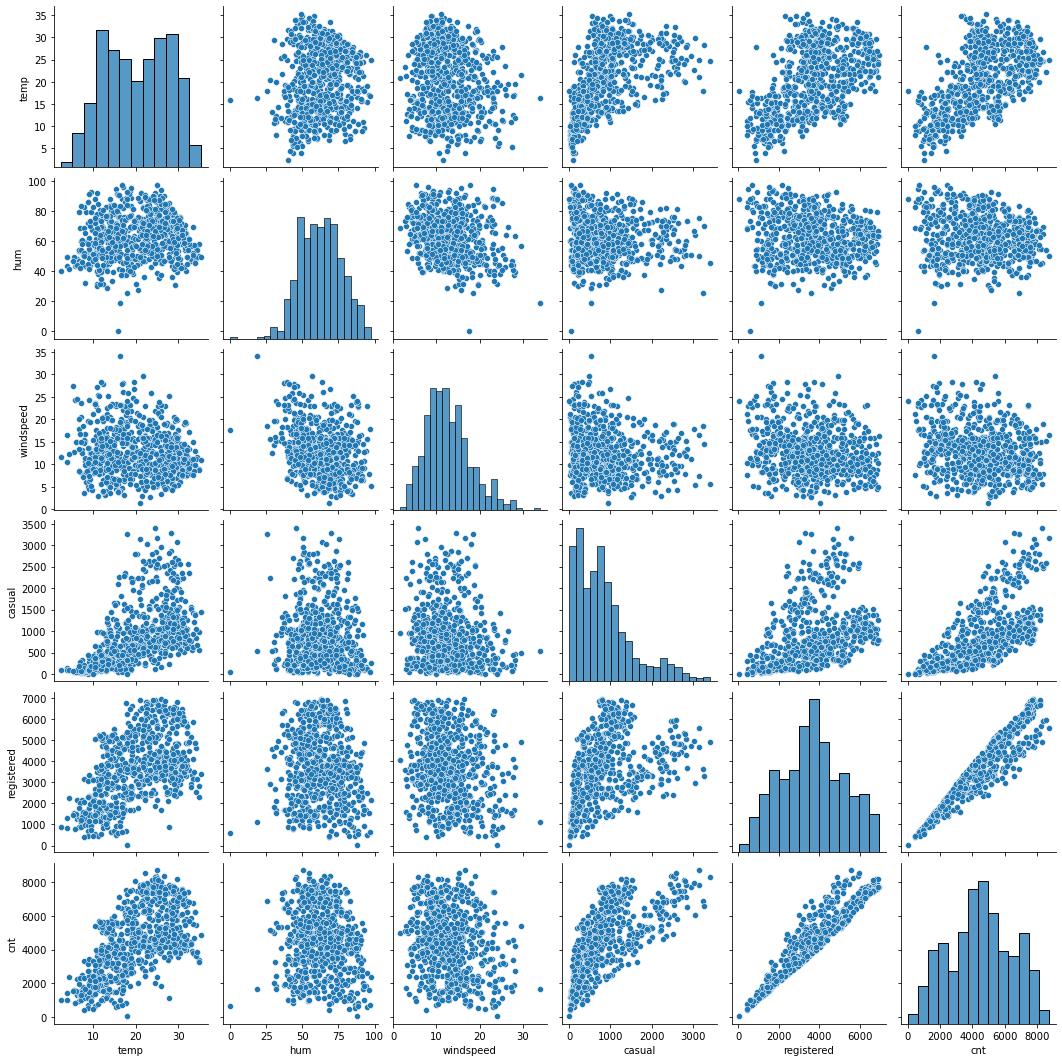

In [74]:
# ploting pair plot of the important numric variables

sns.pairplot(dataset[['temp','hum','windspeed','casual','registered','cnt']])
plt.show()

### Inferences - 
1. registered users have highest impact on the cnt
2. casual users shouwing second most impact on the cnt
3. Temperature also looks co-related, number of users are higher when temp is more.
4. hum and windspeed are exibiting any singificunt influent on cnt.

#### Visualising Categorical Variables

Let's make a boxplot for the categorical variables.

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

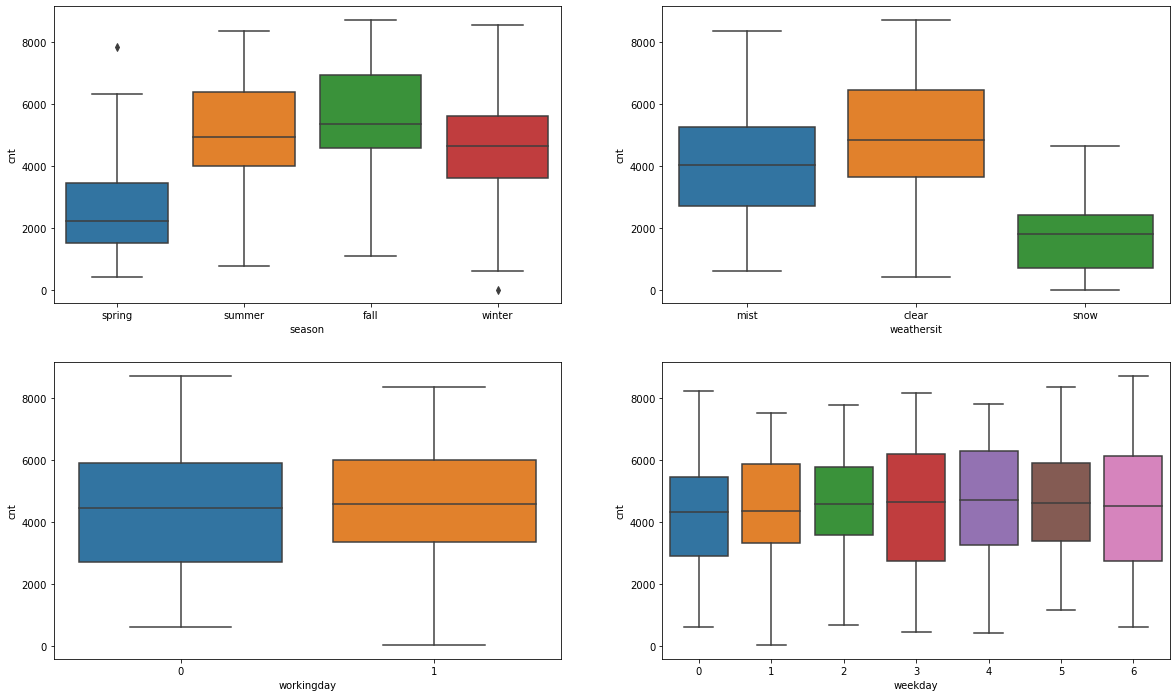

In [76]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = dataset)
plt.subplot(2,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = dataset)
plt.subplot(2,2,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = dataset)
plt.subplot(2,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = dataset)

### Inferences

1. In fall shared bike uses are higher compared to other season.
2. People tend to use the shared bikes more in clear wheather
3. holidays and day of week seem to be not exibiting any significunt influence on the shared bike uses pattern

## Step 4: Data Preparation


In [108]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   temp        730 non-null    float64
 6   hum         730 non-null    float64
 7   windspeed   730 non-null    float64
 8   casual      730 non-null    int64  
 9   registered  730 non-null    int64  
 10  cnt         730 non-null    int64  
 11  spring      730 non-null    uint8  
 12  summer      730 non-null    uint8  
 13  winter      730 non-null    uint8  
 14  mist        730 non-null    uint8  
 15  snow        730 non-null    uint8  
dtypes: float64(3), int64(8), uint8(5)
memory usage: 66.4 KB


In [109]:
dataset.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,spring,summer,winter,mist,snow
0,0,1,0,6,0,14.110847,80.5833,10.749882,331,654,985,1,0,0,1,0
1,0,1,0,0,0,14.902598,69.6087,16.652113,131,670,801,1,0,0,1,0
2,0,1,0,1,1,8.050924,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,82,1518,1600,1,0,0,0,0


### Dummy Variables

The variable `season` has four levels. We have these levels in integers. 

Now we will convert them to `dummy variables`.

In [81]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status'
seasons = pd.get_dummies(dataset['season'])

In [82]:
seasons.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, we don't need four columns. We an drop the `fall` column, as the season can be identified with just the last three columns where — 
- `000` will correspond to `fall`
- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`

In [83]:
# Let's drop the first column from seasons df using 'drop_first = True'

seasons = pd.get_dummies(dataset['season'], drop_first = True)

In [84]:
# Add the results to the original dataset

dataset = pd.concat([dataset, seasons], axis = 1)

In [85]:
# Drop 'season' as we have created the dummies for it

dataset.drop(['season'], axis = 1, inplace = True)

In [86]:
dataset.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [87]:
dataset['weathersit'].value_counts()

clear    463
mist     246
snow      21
Name: weathersit, dtype: int64

#### There is no value for Rain in weathersit

In [88]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'status'
weather = pd.get_dummies(dataset['weathersit'])

In [89]:
weather.head()

,clear,mist,snow
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


Now, we don't need three columns. We can drop the `clear` column, as the whater can be identified with just the last two columns where — 
- `00` will correspond to `clear`
- `01` will correspond to `snow`
- `10` will correspond to `mist`

In [90]:
# Let's drop the first column from whater df using 'drop_first = True'

weather = pd.get_dummies(dataset['weathersit'], drop_first = True)

In [91]:
# Add the results to the original dataset

dataset = pd.concat([dataset, weather], axis = 1)

In [95]:
# Drop 'weathersit' as we have created the dummies for it

dataset.drop(['weathersit'], axis = 1, inplace = True)

In [93]:
dataset.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,mist,snow
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


## Step 5: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [248]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [187]:
from sklearn.preprocessing import MinMaxScaler

In [188]:
scaler = MinMaxScaler()

In [189]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['mnth', 'weekday', 'temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [190]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,spring,summer,winter,mist,snow
653,1,0.818182,0,0.333333,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,0,0,1,0,0
576,1,0.545455,0,0.333333,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,0,0,0,0
426,1,0.181818,0,1.000000,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,0,0,1,0
728,1,1.000000,0,0.000000,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1,0,0,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,1,0,1,0


In [191]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,spring,summer,winter,mist,snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.498366,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,0.245098,0.24902,0.343137,0.029412
std,0.500429,0.315338,0.157763,0.336182,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,0.430568,0.43287,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


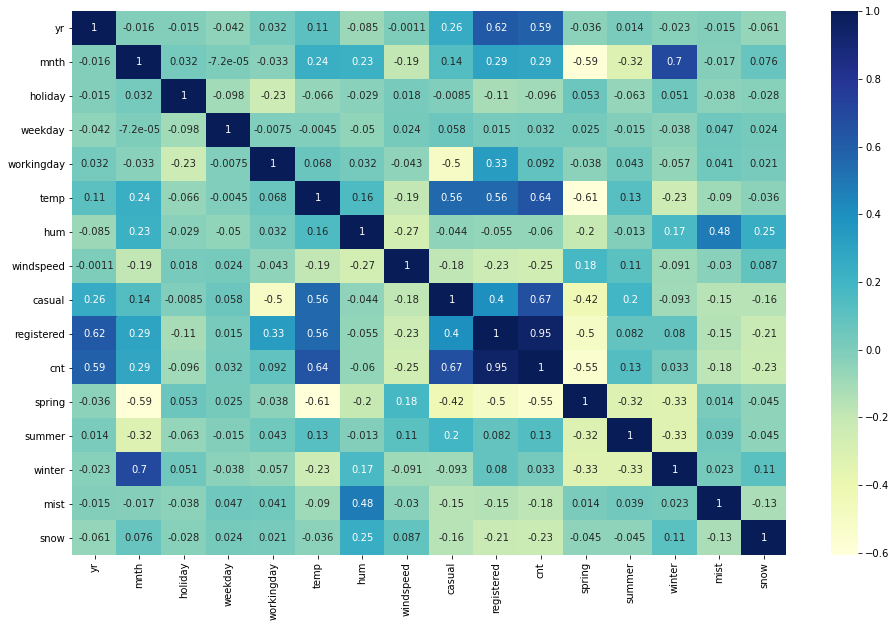

In [192]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### As expected, registered, casual and temp are the most correlated variables for the target variable

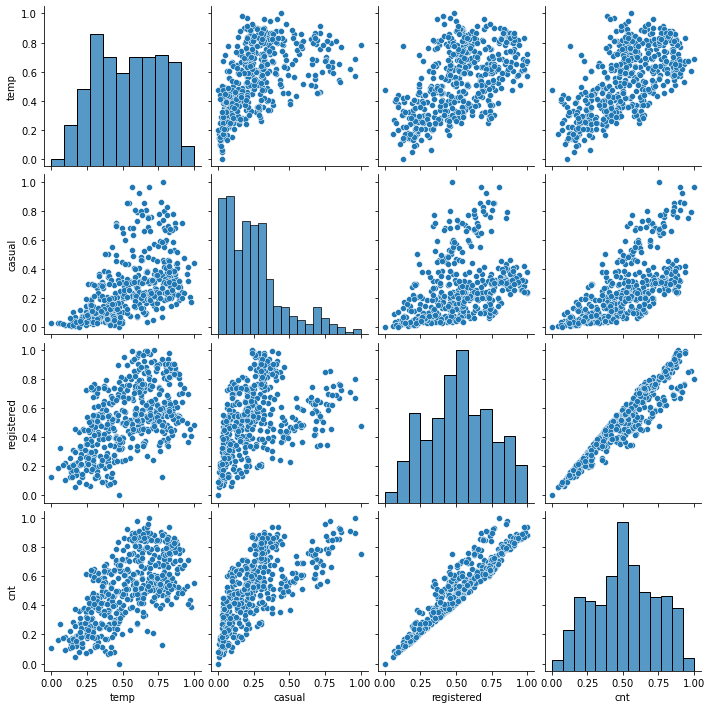

In [193]:
# ploting most related numeric variables

sns.pairplot(df_train[['temp','casual','registered','cnt']])
plt.show()

### This gives us registered as the primary feature to which we would fit the regression line

In [194]:
# Dividing into X and Y sets for the model building

y_train = df_train.pop('cnt')
X_train = df_train

## Step 6: Building a linear model


In [195]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['registered']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [196]:
# Check the parameters obtained

lr.params

const         0.024532
registered    0.933473
dtype: float64

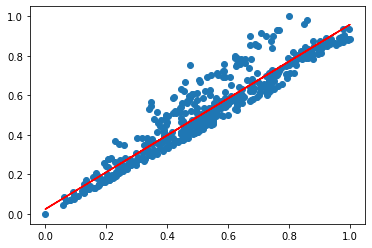

In [197]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.0245 + 0.933*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [198]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     4541.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.75e-255
Time:                        19:21:52   Log-Likelihood:                 624.12
No. Observations:                 510   AIC:                            -1244.
Df Residuals:                     508   BIC:                            -1236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0245      0.008      3.099      0.0

### Adding another variable

As from inferences above we can add the additional variables casual and temp to improve the fit.

In [199]:
# Assign all the feature variables to X
X_train_lm = X_train[['registered', 'casual','temp']]

In [200]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         5.915407e-16
registered    7.968247e-01
casual        3.774735e-01
temp         -1.942890e-16
dtype: float64

In [201]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.244e+32
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:21:54   Log-Likelihood:                 17576.
No. Observations:                 510   AIC:                        -3.514e+04
Df Residuals:                     506   BIC:                        -3.513e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.915e-16   3.31e-17     17.884      0.0

### Adding all the variables to the model

In [202]:
# Check all the columns of the dataframe

dataset.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'spring', 'summer',
       'winter', 'mist', 'snow'],
      dtype='object')

In [203]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         6.938894e-16
yr            1.734723e-18
mnth          5.551115e-17
holiday      -1.387779e-16
weekday      -1.387779e-16
workingday    3.365364e-16
temp         -5.620504e-16
hum           2.220446e-16
windspeed    -3.053113e-16
casual        3.774735e-01
registered    7.968247e-01
spring       -2.081668e-16
summer       -2.914335e-16
winter       -2.012279e-16
mist         -1.040834e-16
snow         -5.689893e-16
dtype: float64

In [204]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.539e+31
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:21:56   Log-Likelihood:                 17587.
No. Observations:                 510   AIC:                        -3.514e+04
Df Residuals:                     494   BIC:                        -3.507e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.939e-16   1.12e-16      6.172      0.0

The R-squared value is 1 which means we might be overfitting the regression line. Lets try to remove the features which are less relevent and try to achive the highest score with least number of variables.

Looking at p-value it looks like yr is the insignificunt variables anso mnth also can be dropped.

Lets check VIF to take the decision.

### Checking VIF

In [205]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [206]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,registered,42.78
5,temp,31.21
6,hum,30.20
1,mnth,12.73
4,workingday,10.47
8,casual,9.81
0,yr,6.01
7,windspeed,5.02
12,winter,4.93
10,spring,4.51


### Dropping the variable and updating the model

VIF is very high for registered users. Lets try to drop this column and check where it takes.

In [207]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('registered', 1,)

In [208]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [209]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     340.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.30e-243
Time:                        19:22:01   Log-Likelihood:                 641.49
No. Observations:                 510   AIC:                            -1253.
Df Residuals:                     495   BIC:                            -1189.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1035      0.030      3.464      0.0

In [210]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,30.19
5,temp,26.40
1,mnth,12.55
8,casual,8.84
4,workingday,6.42
7,windspeed,4.91
11,winter,4.62
9,spring,4.50
3,weekday,3.26
10,summer,2.91


### Dropping the Variable and Updating the Model

As we can notice hum variable have high VIF value. let's drop this variable and update the model.

In [211]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('hum', 1)

In [212]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [213]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     364.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          6.99e-244
Time:                        19:22:03   Log-Likelihood:                 639.07
No. Observations:                 510   AIC:                            -1250.
Df Residuals:                     496   BIC:                            -1191.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0709      0.026      2.733      0.0

In [214]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,19.03
1,mnth,11.39
7,casual,8.84
4,workingday,6.39
6,windspeed,4.81
10,winter,4.06
3,weekday,3.26
8,spring,2.46
0,yr,2.41
9,summer,2.29


### Dropping the Variable and Updating the Model

Now we can see holiday has high P value and the variable is insignificunt . let's drop this variable and update the model.

In [215]:
X = X.drop('holiday', 1)

In [216]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [217]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     395.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.55e-245
Time:                        19:22:06   Log-Likelihood:                 639.04
No. Observations:                 510   AIC:                            -1252.
Df Residuals:                     497   BIC:                            -1197.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0716      0.026      2.777      0.0

In [218]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,18.59
1,mnth,11.32
6,casual,8.63
3,workingday,5.96
5,windspeed,4.81
9,winter,4.05
2,weekday,3.25
0,yr,2.41
7,spring,2.38
8,summer,2.26


### Dropping the Variable and Updating the Model

Now we can see holiday has high P value and the variable is insignificunt . let's drop this variable and update the model.

In [219]:
X = X.drop('summer', 1)

In [220]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [221]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     431.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.70e-246
Time:                        19:22:08   Log-Likelihood:                 639.02
No. Observations:                 510   AIC:                            -1254.
Df Residuals:                     498   BIC:                            -1203.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0744      0.021      3.583      0.0

In [222]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,18.16
1,mnth,10.62
6,casual,7.55
3,workingday,5.22
5,windspeed,4.01
8,winter,3.98
2,weekday,3.24
0,yr,2.39
7,spring,1.82
9,mist,1.54


### Dropping the Variable and Updating the Model

Now we can see temp is having very high VIF. Let's drop this variable and update the model.


In [223]:
X = X.drop('temp', 1)

In [224]:
# Build a sixth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [225]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     411.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.21e-234
Time:                        19:22:11   Log-Likelihood:                 605.93
No. Observations:                 510   AIC:                            -1190.
Df Residuals:                     499   BIC:                            -1143.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1498      0.020      7.522      0.0

In [226]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,mnth,7.89
4,windspeed,3.82
5,casual,3.75
2,weekday,3.23
3,workingday,3.20
7,winter,2.98
0,yr,2.38
6,spring,1.76
8,mist,1.52
9,snow,1.10


### Dropping the Variable and Updating the Model

Now we can see mnth is having very high VIF. Let's drop this variable and update the model.

In [227]:
X = X.drop('mnth', 1)

In [228]:
# Build a seventh fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [229]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     441.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.01e-231
Time:                        19:22:13   Log-Likelihood:                 597.15
No. Observations:                 510   AIC:                            -1174.
Df Residuals:                     500   BIC:                            -1132.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1874      0.018     10.379      0.0

In [230]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.72
1,weekday,3.18
4,casual,2.87
2,workingday,2.63
0,yr,2.36
5,spring,1.68
7,mist,1.51
6,winter,1.39
8,snow,1.10


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [249]:
y_train_cnt = lr_7.predict(X_train_lm)

In [250]:
X_train_lm.shape

(510, 10)

Text(0.5, 0, 'Errors')

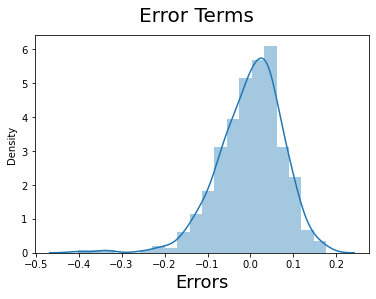

In [251]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [252]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [253]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,spring,summer,winter,mist,snow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.497717,0.036530,0.503044,0.698630,0.558941,0.638508,0.313350,0.266372,0.527146,0.520592,0.255708,0.264840,0.232877,0.319635,0.027397
std,0.500722,0.311080,0.188034,0.331402,0.459904,0.233698,0.148974,0.159947,0.217246,0.217921,0.218435,0.437258,0.442259,0.423633,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.002133,0.059486,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.354650,0.527265,0.198517,0.101951,0.359154,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.558691,0.627737,0.299459,0.223712,0.526567,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.759096,0.743928,0.403048,0.362085,0.664742,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.038708,0.985273,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [254]:
y_test = df_test.pop('cnt')
X_test = df_test

In [255]:
# Adding constant variable to test dataframe
X_test_m7 = sm.add_constant(X_test)

In [256]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m7 = X_test_m7.drop(["registered", "hum", "holiday", "summer","temp", "mnth"], axis = 1)
X_test_m7.shape

(219, 10)

In [257]:
X_test_m7.columns

Index(['const', 'yr', 'weekday', 'workingday', 'windspeed', 'casual', 'spring',
       'winter', 'mist', 'snow'],
      dtype='object')

In [258]:
# Making predictions using the seventh model

y_pred_m7 = lr_7.predict(X_test_m7)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

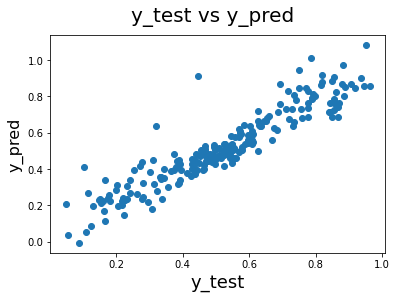

In [260]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m7)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     